In [1]:
import numpy as np
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt

### Exercise 2.1:

In [2]:
# Set Parameters
beta = 0.442   # 20 year discount factor
delta = 0.6415 # 20 year depreciation rate
sigma = 3.0    # coeff of risk aversion
A = 1.0        # productivity scale parmeter
alpha = 0.35   # capital share of income

def get_L(nvec):
    L = nvec.sum()
    return L

def get_K(bvec):
    K = bvec.sum()
    return K

def get_r(K, L, params):
    alpha, A, delta = params
    r = alpha * A * (L/K)**(1-alpha) - delta
    return r

def get_w(K, L, params):
    alpha, A, delta = params
    w = (1-alpha) * A * (K/L)**alpha
    return w

def get_c(nvec, bvec, w, r):
    c = np.zeros(len(nvec))
    c[0] = w*nvec[0] - bvec[0]
    c[1] = w*nvec[1] + (1+r)*bvec[0] - bvec[1]
    c[2] = w*nvec[2] + (1+r)*bvec[1]
    return c

def u_prime(c, sigma):
    u_p = c**(-sigma)
    return u_p

def feasible(f_params, bvec_guess):
    nvec, A, alpha, delta = f_params
    params = (alpha, A, delta)
    
    K = get_K(bvec_guess)
    L = get_L(nvec)
    r = get_r(K, L, params)
    w = get_w(K, L, params)
    c = get_c(nvec, bvec_guess, w, r)
    
    k_cnstr = K <= 0
    c_cnstr = c<=0
    
    # getting b_cnstr
    b_cnstr = np.array([False, False])
    if c_cnstr[0]:
        b_cnstr[0] = True
    if c_cnstr[1]:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2]:
        b_cnstr[1] = True
   
    return (b_cnstr, c_cnstr, k_cnstr)

nvec = np.array([1, 1, 0.2])
f_params = (nvec, A, alpha, delta)

# 2.1(a) 
bvec_guess = np.array([1.0, 1.2])
b_cnstr, c_cnstr, k_cnstr = feasible(f_params, bvec_guess)
print("For bvec_guess = [1.0, 1.2]:- \nb_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr)
print("k_cnstr:", k_cnstr,)

# 2.1(b)
bvec_guess = np.array([0.06, -0.001])
b_cnstr, c_cnstr, k_cnstr = feasible(f_params, bvec_guess)
print("\nFor bvec_guess = [0.06, -0.001]:- \nb_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr)
print("k_cnstr:", k_cnstr)

# 2.1(c)
bvec_guess = np.array([0.1, 0.1])
b_cnstr, c_cnstr, k_cnstr = feasible(f_params, bvec_guess)
print("\nFor bvec_guess = [0.1, 0.1]:- \nb_cnstr:", b_cnstr)
print("c_cnstr:", c_cnstr)
print("k_cnstr:", k_cnstr)

For bvec_guess = [1.0, 1.2]:- 
b_cnstr: [ True False]
c_cnstr: [ True False False]
k_cnstr: False

For bvec_guess = [0.06, -0.001]:- 
b_cnstr: [False False]
c_cnstr: [False False False]
k_cnstr: False

For bvec_guess = [0.1, 0.1]:- 
b_cnstr: [False False]
c_cnstr: [False False False]
k_cnstr: False


### Exercise 2.2:

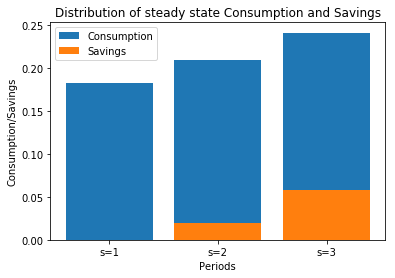

{'b_ss': array([0.01931252, 0.05841087]), 'c_ss': array([0.18241193, 0.20961477, 0.24087341]), 'w_ss': 0.20172444618280236, 'r_ss': 2.4330683174596803, 'K_ss': 0.07772339324650562, 'Y_ss': 0.6827596640033311, 'C_ss': 0.6329001072356977, 'EulErr_ss': array([-0.00048257,  0.00095614]), 'RCerr_ss': 7.632783294297951e-17, 'ss_time': 0.0010187820935324964}


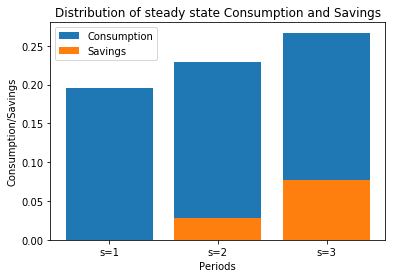

{'b_ss': array([0.0281769 , 0.07686542]), 'c_ss': array([0.19597526, 0.2286159 , 0.26669303]), 'w_ss': 0.22415215565391486, 'r_ss': 1.8863773493522455, 'K_ss': 0.10504231629369658, 'Y_ss': 0.7586688345209426, 'C_ss': 0.6912841886185362, 'EulErr_ss': array([6.13542633e-05, 2.40931391e-05]), 'RCerr_ss': -1.3877787807814457e-17, 'ss_time': 0.00032219039488851076}


In [3]:
def euler(bvec_guess, *params):
    beta, sigma, nvec, L, A, alpha, delta = params
    params1 = (alpha, A, delta)
    K = get_K(bvec_guess)
    r = get_r(K, L, params1)
    w = get_w(K, L, params1)
    c = get_c(nvec, bvec_guess, w, r)
    # euler errors
    err1 = beta*(1+r)*u_prime(c[1], sigma) - u_prime(c[0], sigma)
    err2 = beta*(1+r)*u_prime(c[2], sigma) - u_prime(c[1], sigma) 
    errors = [err1, err2]
    return errors
    
def get_SS(params, bvec_guess, SS_graphs):

    # timer
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    params1 = (alpha, A, delta)
    args_eul = (beta, sigma, nvec, L, A, alpha, delta)
    
    # Run the root optimizer
    result = opt.root(euler, bvec_guess, args = args_eul, tol = SS_tol)
    b_ss = result.x
    EulErr_ss = result.fun
    
    K_ss = get_K(b_ss)
    r_ss = get_r(K_ss, L, params1)
    w_ss = get_w(K_ss, L, params1)
    c_ss = get_c(nvec, b_ss, w_ss, r_ss)
    Y_ss = A * (K_ss**alpha) * (L**(1-alpha))
    C_ss = c_ss.sum()
    
    RCerr_ss = Y_ss - C_ss - delta*K_ss
    
    # stop timer
    ss_time = time.clock()-start_time
    
    if SS_graphs:
        plt.bar(["s=1", "s=2", "s=3"], c_ss, label="Consumption")
        plt.bar(["s=2", "s=3"], b_ss, label='Savings')
        plt.title("Distribution of steady state Consumption and Savings")
        plt.xlabel("Periods")
        plt.ylabel("Consumption/Savings")
        plt.legend()
        plt.show()
    
    ss_output = {
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
        'ss_time': ss_time}
    return(ss_output)

bvec_guess = np.array([0.1, 0.1])
ss_tol = 1e-4
L = nvec.sum()

# 2.2(a) & (b)
params = (beta, sigma, nvec, L, A, alpha, delta, ss_tol)
ss_output = get_SS(params, bvec_guess, True)
print(ss_output)

# 2.2(c)
params = (0.55, sigma, nvec, L, A, alpha, delta, ss_tol)
ss_output = get_SS(params, bvec_guess, True)
print(ss_output)

Intuitionally, as $\beta$ increases (i.e. people become more patient) people would save more for future. This will lead to more savings, and thereby more capital in the economy. This will bring the interest rate down. Because of increased capital, wages will increase and so will the consumption in the steady state. This intuition is on the same lines of the results where we can se that $\{\bar{c_s}\}_{s=1}^3$, $\{\bar{b_s}\}_{s=1}^2$, $w$ has increased, whereas $r$ has decreased.

### Exercise 2.3

The maximum of all Euler Error is:  0.00023199888565272886 



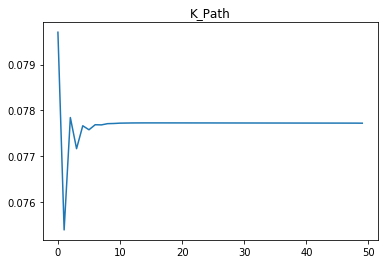

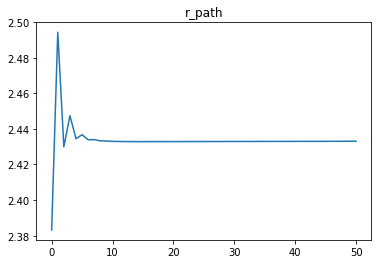

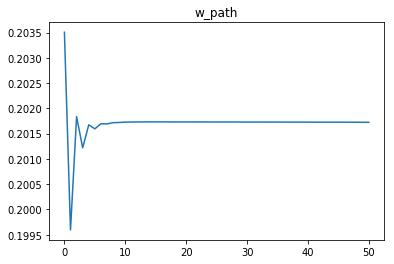

(K_t - K_bar) < 0.00001: 
 [False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [4]:
# Additional parameters
T = 50
max_iter = 1000 
xi = 0.5
bvec_init = np.array([0.1, 0.1])

def euler_b32(b32, *args):
    (r1, r2, w1, w2, nvec, b21, beta, sigma) = args
    c21 = (1 + r1) * b21 + w1 * nvec[1] - b32
    c32 = (1 + r2) * b32 + w2 * nvec[2]
    err = (u_prime(c21, sigma) - beta * (1 + r2) *
                   u_prime(c32, sigma))
    return err

def euler_TPI(guesses, *args):
    b2, b3 = guesses
    (r_tp1, r_tp2, w_t, w_tp1, w_tp2, nvec, beta, sigma) = args
    c1 = w_t * nvec[0] - b2
    c2 = (1 + r_tp1) * b2 + w_tp1 * nvec[1] - b3
    c3 = (1 + r_tp2) * b3 + w_tp2 * nvec[2]
    agg_c = c1+c2+c3
    err1 = (u_prime(c1, sigma) - beta * (1 + r_tp1) *
                    u_prime(c2, sigma))
    err2 = (u_prime(c2, sigma) - beta * (1 + r_tp2) *
                    u_prime(c3, sigma))
    errors = [err1, err2]
    return errors

# For steady state
L = get_L(nvec)
args_eul = (beta, sigma, nvec, L, A, alpha, delta)
params1 = (alpha, A, delta)
results = opt.root(euler, bvec_init, args=args_eul, tol=ss_tol)
b_ss = results.x
zero_val = results.fun
K_ss = get_K(b_ss)
L_ss = get_L(nvec)
r_ss = get_r(K_ss, L, params1)
w_ss = get_w(K_ss, L, params1)


bvec_init = np.array([0.8 * b_ss[0], 1.1 * b_ss[1]])
K_init = get_K(bvec_init)
Kpath = np.linspace(K_init, K_ss, num=T)

euler_err = list()
dist = 10
epsilon = 1e-9
# Iteration for upto max_iter
for itr in range(max_iter):
    L = get_L(nvec)
    rpath = get_r(Kpath, L, params1)
    rpath = np.append(rpath, r_ss)
    wpath = get_w(Kpath, L, params1)
    wpath = np.append(wpath, w_ss)
    b32_guess = bvec_init[1]
    b32_args = (rpath[0], rpath[1], wpath[0], wpath[1], nvec, bvec_init[0],
                beta, sigma)
    # Solve for b_3,2
    results = opt.root(euler_b32, b32_guess, args=b32_args, tol=ss_tol)
    b32 = results.x
    error_b32=results.fun
    euler_err.extend(error_b32.tolist())
    bmat = np.zeros((T+1, 2))
    bmat[0] = bvec_init
    bmat[1, 1] = b32
    
    for t in range(1, T):
        bguess = [bmat[t, 0], bmat[t-1, 1]]
        b_args = (rpath[t], rpath[t+1], wpath[t-1], wpath[t],
                  wpath[t], nvec, beta, sigma)
        results = opt.root(euler_TPI, bguess, args=b_args, tol=ss_tol)
        b2, b3 = results.x
        errors = results.fun
        euler_err.extend(errors.tolist())
        bmat[t, 0] = b2
        bmat[t+1, 1] = b3

    Kprime = bmat.sum(axis=1)
    dist = ((Kpath[:-1] - Kprime[:-2]) ** 2).sum()
    Kpath = xi * Kprime[:-2] + (1 - xi) * Kpath[:-1]
    Kpath = np.append(Kpath, K_ss)
    if abs(dist) < epsilon:
        break

Lpath = np.ones(len(Kpath))*2.2   
Ypath = A*((Kpath)**alpha)*(Lpath)**(1-alpha)

# 2.3(a)
print('The maximum of all Euler Error is: ', max(np.abs(euler_err)), "\n")

# 2.3(b)
plt.plot(Kpath)       #K_path
plt.title('K_Path')
plt.show()
plt.plot(rpath)       #r_path
plt.title('r_path')
plt.show()
plt.plot(wpath)       #w_path
plt.title('w_path')
plt.show()

# 2.3(c)
K_check = abs(bmat.sum(axis=1)-K_ss)<1e-05
print("(K_t - K_bar) < 0.00001: \n", K_check[0:T])

It can be seen from above that the economy took 10 periods to get within 0.00001 of the steady-state aggregate capital stock $\bar{K}$ and thereafter it never got farther than 0.00001 away from the steady-state!

### Exercise 3.2

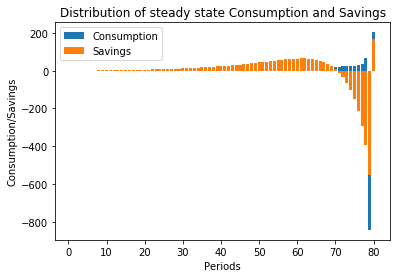

{'b_ss': array([ 1.81389861e-01,  3.73139410e-01,  5.75839931e-01,  7.90116294e-01,
        1.01662888e+00,  1.25607548e+00,  1.50919343e+00,  1.77676187e+00,
        2.05960398e+00,  2.35858950e+00,  2.67463729e+00,  3.00871796e+00,
        3.36185666e+00,  3.73513602e+00,  4.12969919e+00,  4.54675300e+00,
        4.98757128e+00,  5.45349833e+00,  5.94595239e+00,  6.46642924e+00,
        7.01650584e+00,  7.59784406e+00,  8.21219457e+00,  8.86140037e+00,
        9.54740036e+00,  1.02722329e+01,  1.10380390e+01,  1.18470649e+01,
        1.27016649e+01,  1.36043022e+01,  1.45575501e+01,  1.55640915e+01,
        1.66267165e+01,  1.77483179e+01,  1.89318859e+01,  2.01804972e+01,
        2.14973017e+01,  2.28855032e+01,  2.43483358e+01,  2.58890297e+01,
        2.75107704e+01,  2.92166447e+01,  3.10095712e+01,  3.28922164e+01,
        3.48668843e+01,  3.69353840e+01,  3.90988580e+01,  4.13575768e+01,
        4.37106794e+01,  4.61558550e+01,  4.86889483e+01,  5.13034792e+01,
        5.399004

In [5]:
# Set Parameters
S = 80         # 80 periods
beta = 0.96    # annual discount factor
delta = 0.05   # annual depreciation rate
sigma = 3.0    # coeff of risk aversion
A = 1.0        # productivity scale parmeter
alpha = 0.35   # capital share of income

def get_L(nvec):
    L = nvec.sum()
    return L

def get_K(bvec):
    K = bvec.sum()
    return K

def get_r(K, L, params):
    alpha, A, delta = params
    r = alpha * A * (L/K)**(1-alpha) - delta
    return r

def get_w(K, L, params):
    alpha, A, delta = params
    w = (1-alpha) * A * (K/L)**alpha
    return w

def get_c(nvec, bvec, w, r):
    c = np.zeros(len(nvec))
    c[0] = w*nvec[0] - bvec[0]
    for i in range(1, len(nvec)-1):
        c[i] = w*nvec[i] + (1+r)*bvec[i-1] - bvec[i]
    c[len(nvec)-1] = w*nvec[len(nvec)-1] + (1+r)*bvec[len(nvec)-2]
    return c

def u_prime(c, sigma):
    u_p = c**(-sigma)
    return u_p

def euler(bvec_guess, *params):
    beta, sigma, nvec, L, A, alpha, delta = params
    params1 = (alpha, A, delta)
    K = get_K(bvec_guess)
    r = get_r(K, L, params1)
    w = get_w(K, L, params1)
    c = get_c(nvec, bvec_guess, w, r)
    # euler errors
    errors = np.zeros(len(nvec)-1)
    for i in range(len(nvec)-1):
        errors[i] = beta*(1+r)*u_prime(c[i+1], sigma) - u_prime(c[i], sigma)
    return errors
    
def get_SS(params, bvec_guess, SS_graphs):

    # timer
    start_time = time.clock()
    beta, sigma, nvec, L, A, alpha, delta, SS_tol = params
    params1 = (alpha, A, delta)
    args_eul = (beta, sigma, nvec, L, A, alpha, delta)
    
    # Run the root optimizer
    result = opt.root(euler, bvec_guess, args = args_eul, tol = SS_tol)
    b_ss = result.x
    EulErr_ss = result.fun
    
    K_ss = get_K(b_ss)
    r_ss = get_r(K_ss, L, params1)
    w_ss = get_w(K_ss, L, params1)
    c_ss = get_c(nvec, b_ss, w_ss, r_ss)
    Y_ss = A * (K_ss**alpha) * (L**(1-alpha))
    C_ss = c_ss.sum()
    
    RCerr_ss = Y_ss - C_ss - delta*K_ss
    
    # stop timer
    ss_time = time.clock()-start_time
    
    if SS_graphs:
        plt.bar(list(range(1, S+1)), c_ss, label="Consumption")
        plt.bar(list(range(2, S+1)), b_ss, label='Savings')
        plt.title("Distribution of steady state Consumption and Savings")
        plt.xlabel("Periods")
        plt.ylabel("Consumption/Savings")
        plt.legend()
        plt.show()
    
    ss_output = {
        'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
        'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
        'ss_time': ss_time}
    return(ss_output)

nvec = np.full(S, 1)
for i in range (54, S):
    nvec[i] = 0.2
bvec_guess = np.full(S-1, 0.1)
ss_tol = 1e-4
L = get_L(nvec)

# 3.2(a) & (b)
params = (beta, sigma, nvec, L, A, alpha, delta, ss_tol)
ss_output = get_SS(params, bvec_guess, True)
print(ss_output)

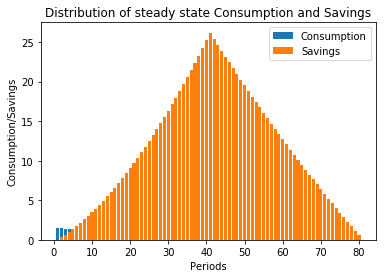

{'b_ss': array([ 0.31173391,  0.64216296,  0.99124514,  1.35883698,  1.74796954,
        2.15226018,  2.57481082,  3.01544435,  3.47409469,  3.95066661,
        4.44506152,  4.95718922,  5.48695971,  6.03428478,  6.5990779 ,
        7.18125419,  7.78073041,  8.39742494,  9.03125776,  9.68215043,
       10.35002609, 11.03480942, 11.73642663, 12.45480547, 13.18987518,
       13.94156651, 14.70981167, 15.49454439, 16.29569982, 17.11321463,
       17.9470269 , 18.79707623, 19.66330359, 20.54565229, 21.44406088,
       22.35843022, 23.28879592, 24.23505073, 25.19713938, 26.17473251,
       25.40928593, 24.65058069, 23.89851311, 23.15297629, 22.41393841,
       21.68135267, 20.9551183 , 20.23511491, 19.52122961, 18.81336369,
       18.11142966, 17.41534677, 16.72503778, 16.04042704, 15.36143939,
       14.68799968, 14.02003263, 13.35746282, 12.70021484, 12.04821343,
       11.40138368, 10.7596512 , 10.12294225,  9.49118385,  8.8643038 ,
        8.24223076,  7.62489425,  7.01222464,  6.404153

In [6]:
# 3.2(c)
for i in range (40, S):
    nvec[i] = 0.2
params = (beta, sigma, nvec, L, A, alpha, delta, ss_tol)
ss_output = get_SS(params, bvec_guess, True)
print(ss_output)